# Chicago crime

This dataset reflects reported incidents of crime (with the exception of murders where data exists for each victim) that occurred in the City of Chicago from 2001 to present. Source – [Chicago Data Portal](https://data.cityofchicago.org/Public-Safety/Crimes-2001-to-present-Dashboard/5cd6-ry5g)

On this dataset we'll showcase some Pandas features, but for a more complete reference, please keep the [Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/index.html) bookmarked.

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np

## Read the data

The dataset is pretty large…

In [19]:
! pwd

/home/jovyan/JupyterNotebookForDataScience/MyWork/Data/2_ChicagoCrimeData


In [20]:
! ls /home/jovyan/JupyterNotebookForDataScience/MyWork/Data/2_ChicagoCrimeData

2Crimes_-_2001_to_Present.csv  ChicagoCrimeDatabase.ipynb
3Crimes_-_2001_to_Present.csv  Pchicago_crime.ipynb


#Let's see what the CSV file looks like…

In [14]:
! head /home/jovyan/JupyterNotebookForDataScience/MyWork/Data/2_ChicagoCrimeData/2Crimes_-_2001_to_Present.csv

﻿ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,false,true,0631,006,8,44,06,,,2018,04/06/2019 04:04:43 PM,,,
11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,,false,false,0824,008,15,63,11,,,2016,04/06/2019 04:04:43 PM,,,
11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,false,false,1913,019,47,3,17,,,2017,09/13/2018 03:56:52 PM,,,
11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,false,false,0811,008,23,56,11,,,2015,04/06/2019 04:04:43 PM,,,
10224881,HY411873,09/03/2015 06:00:00 PM,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PRO

In [16]:
pd.read_csv("2Crimes_-_2001_to_Present.csv")

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
1,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11243268,JB167760,01/01/2017 12:01:00 AM,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
3,11645527,JC212744,02/02/2015 10:00:00 AM,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,10224881,HY411873,09/03/2015 06:00:00 PM,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,...,4.0,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2431197,13128007,JG325985,06/21/2023 08:00:00 PM,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,...,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
2431198,13128324,JG326502,05/13/2023 12:00:00 PM,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,...,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
2431199,13128375,JG326564,06/24/2023 01:29:00 PM,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,...,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
2431200,13129172,JG327619,06/20/2023 04:00:00 AM,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,...,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"


In [17]:
# Python variables work with bash commands \o/
file_path = '/home/jovyan/JupyterNotebookForDataScience/MyWork/Data/2_ChicagoCrimeData/2Crimes_-_2001_to_Present.csv'

# first line
!head $file_path -n 1

!echo

# second line
!head $file_path -n 2 | tail -n 1

﻿ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location

11646166,JC213529,09/01/2018 12:01:00 AM,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,false,true,0631,006,8,44,06,,,2018,04/06/2019 04:04:43 PM,,,


As the file size is pretty big, let's first create a subset to iterate more quickly.

In [21]:
file_path_small = '/home/jovyan/JupyterNotebookForDataScience/MyWork/Data/2_ChicagoCrimeData/3Crimes_-_2001_to_Present.csv'

!head $file_path > $file_path_small

Use the allmighty `pd.read_csv` function

In [22]:
crimes_small = pd.read_csv(file_path_small, parse_dates=[2], index_col=[2])
crimes_small

/tmp/ipykernel_123/2742465374.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes_small = pd.read_csv(file_path_small, parse_dates=[2], index_col=[2])


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15,63,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,...,47,3,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,...,23,56,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-03 18:00:00,10224881,HY411873,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,222,...,4,39,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
2018-07-31 13:30:00,11449702,JB373031,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,...,5,41,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
2018-01-01 08:00:00,11645648,JC212959,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,...,30,19,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-10-13 09:00:00,11241640,JB166009,019XX E 72ND PL,820,THEFT,$500 AND UNDER,STREET,False,False,333,...,5,43,06,NaN,NaN,2017,02/27/2018 03:59:52 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33,14,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


Excellent! Now let's run this on the big file…

In [24]:
crimes = pd.read_csv(file_path, parse_dates=[2], index_col=[2])
crimes.tail()

/tmp/ipykernel_123/1829566363.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  crimes = pd.read_csv(file_path, parse_dates=[2], index_col=[2])


,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-21 20:00:00,13128007,JG325985,031XX N CALIFORNIA AVE,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,1411,...,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
2023-05-13 12:00:00,13128324,JG326502,020XX W CERMAK RD,1120,DECEPTIVE PRACTICE,FORGERY,CURRENCY EXCHANGE,False,False,1234,...,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
2023-06-24 13:29:00,13128375,JG326564,069XX N HAMILTON AVE,1330,CRIMINAL TRESPASS,TO LAND,RESIDENCE,False,False,2411,...,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"
2023-06-20 04:00:00,13129172,JG327619,028XX N MAPLEWOOD AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,True,1411,...,35.0,21.0,08B,1158868.0,1918755.0,2023,08/19/2023 03:40:26 PM,41.932798,-87.691589,"(41.932798095, -87.691589364)"
2023-06-28 18:00:00,13129823,JG328250,059XX S KEELER AVE,0810,THEFT,OVER $500,STREET,False,False,813,...,13.0,65.0,06,1149387.0,1864869.0,2023,08/19/2023 03:40:26 PM,41.785118,-87.727828,"(41.785117789, -87.727827896)"


In [25]:
crimes.index

DatetimeIndex(['2018-09-01 00:01:00', '2016-05-01 00:25:00',
               '2017-01-01 00:01:00', '2015-02-02 10:00:00',
               '2015-09-03 18:00:00', '2018-07-31 13:30:00',
               '2018-01-01 08:00:00', '2017-10-13 09:00:00',
               '2018-12-20 16:00:00', '2018-04-01 00:01:00',
               ...
               '2021-12-19 14:30:00', '2022-10-02 16:15:00',
               '2022-12-22 12:00:00', '2022-01-01 00:01:00',
               '2014-04-15 00:00:00', '2023-06-21 20:00:00',
               '2023-05-13 12:00:00', '2023-06-24 13:29:00',
               '2023-06-20 04:00:00', '2023-06-28 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=2431202, freq=None)

In [26]:
print(f'{crimes.memory_usage().sum() / 1024**2} MB')

375.60913467407227 MB


<Axes: xlabel='Date'>

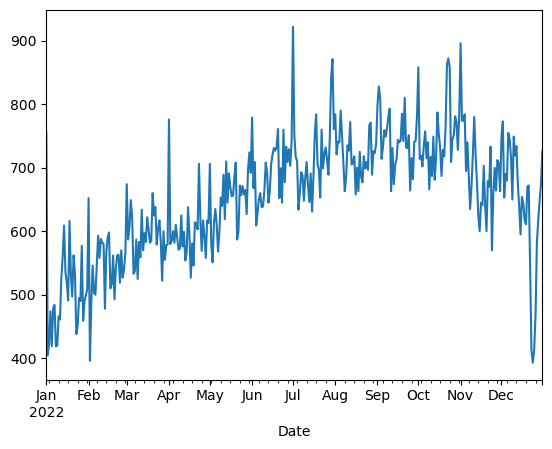

In [27]:
daily_crimes = crimes['Primary Type'].resample('D').count()
daily_crimes.sort_index(inplace=True)
daily_crimes2022 = daily_crimes['2022']
daily_crimes2022.plot()

## Pandas data structures

Let's explain them on the data we have…

### Series

Series is a one-dimensional labeled array capable of holding any data type (integers, strings, floating point numbers, Python objects, etc.).

So, `crime_types` is a series of strings designating types of crimes and labeled with the crime's time of occurrence.

In [28]:
crime_types = crimes['Primary Type']
crime_types

Date
2018-09-01 00:01:00                 THEFT
2016-05-01 00:25:00    DECEPTIVE PRACTICE
2017-01-01 00:01:00           SEX OFFENSE
2015-02-02 10:00:00    DECEPTIVE PRACTICE
2015-09-03 18:00:00       CRIMINAL DAMAGE
                              ...        
2023-06-21 20:00:00       CRIMINAL DAMAGE
2023-05-13 12:00:00    DECEPTIVE PRACTICE
2023-06-24 13:29:00     CRIMINAL TRESPASS
2023-06-20 04:00:00               BATTERY
2023-06-28 18:00:00                 THEFT
Name: Primary Type, Length: 2431202, dtype: object

On the other hand, `daily_crimes2022` is a series with the number of crimes per day.

In [29]:
daily_crimes2022

Date
2022-01-01    756
2022-01-02    405
2022-01-03    423
2022-01-04    474
2022-01-05    419
             ... 
2022-12-27    583
2022-12-28    618
2022-12-29    648
2022-12-30    674
2022-12-31    726
Freq: D, Name: Primary Type, Length: 365, dtype: int64

`crime_type` has an index which is a NumPy array

In [30]:
crime_types.index

DatetimeIndex(['2018-09-01 00:01:00', '2016-05-01 00:25:00',
               '2017-01-01 00:01:00', '2015-02-02 10:00:00',
               '2015-09-03 18:00:00', '2018-07-31 13:30:00',
               '2018-01-01 08:00:00', '2017-10-13 09:00:00',
               '2018-12-20 16:00:00', '2018-04-01 00:01:00',
               ...
               '2021-12-19 14:30:00', '2022-10-02 16:15:00',
               '2022-12-22 12:00:00', '2022-01-01 00:01:00',
               '2014-04-15 00:00:00', '2023-06-21 20:00:00',
               '2023-05-13 12:00:00', '2023-06-24 13:29:00',
               '2023-06-20 04:00:00', '2023-06-28 18:00:00'],
              dtype='datetime64[ns]', name='Date', length=2431202, freq=None)

… and and array of values too

In [31]:
crime_types.values

array(['THEFT', 'DECEPTIVE PRACTICE', 'SEX OFFENSE', ...,
       'CRIMINAL TRESPASS', 'BATTERY', 'THEFT'], dtype=object)

Remember, **data alignment is intrinsic**. If we sort the index, values are still correctly matched to corresponding labels.

In [32]:
crime_types.sort_index(ascending=True).head()

Date
2014-01-01    OFFENSE INVOLVING CHILDREN
2014-01-01    OFFENSE INVOLVING CHILDREN
2014-01-01                 OTHER OFFENSE
2014-01-01           CRIM SEXUAL ASSAULT
2014-01-01            DECEPTIVE PRACTICE
Name: Primary Type, dtype: object

In [33]:
crime_types.sort_index(ascending=False).head()

Date
2023-08-19                      THEFT
2023-08-19    CRIMINAL SEXUAL ASSAULT
2023-08-19                   BURGLARY
2023-08-19                      THEFT
2023-08-19                    BATTERY
Name: Primary Type, dtype: object

### DataFrame

A table-like data structure. Essentially the whole crimes object is a DataFrame.

In [34]:
crimes.head()

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,0810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,...,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,...,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-03 18:00:00,10224881,HY411873,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,222,...,4.0,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"


It also has an index of rows:

In [35]:
crimes.columns

Index(['ID', 'Case Number', 'Block', 'IUCR', 'Primary Type', 'Description',
       'Location Description', 'Arrest', 'Domestic', 'Beat', 'District',
       'Ward', 'Community Area', 'FBI Code', 'X Coordinate', 'Y Coordinate',
       'Year', 'Updated On', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

## Creating pandas objects

So far we've only been creating Pandas objects from CSV files using the `pd.read_csv` function, but we can also create new ones from other Python data structures (which will come in handy later when we get to scraping data from the web).

In [36]:
s = pd.Series({'A': 17, 'B': 6, 'C': 5, 'D': 3, 'E': 19})
s

A    17
B     6
C     5
D     3
E    19
dtype: int64

In [37]:
df = pd.DataFrame({'age': s, 'test': {'A': 0.3, 'B': 59.23, 'C': 16.7, 'D': 2.0, 'E': 5.3}})
df

,age,test
A,17,0.30
B,6,59.23
C,5,16.70
D,3,2.00
E,19,5.30


## Selecting values

Now let's give a very quick over view of the many ways of data selection in Pandas.

### Label-based using `.loc`

By single value – this actually returns a series when we select a single column/row in a DataFrame

In [38]:
df.loc['A']

age     17.0
test     0.3
Name: A, dtype: float64

If we're selecting in a Series, we get back a scalar

In [39]:
s.loc['A']

17

Or we can select by passing a list of labels to select (which keeps the same dimensionality)

In [40]:
# using lists
df.loc[['A', 'B']]

,age,test
A,17,0.30
B,6,59.23


In [41]:
s.loc[['A', 'B']]

A    17
B     6
dtype: int64

We can also select columns

In [42]:
df.loc[:, ['age']]

,age
A,17
B,6
C,5
D,3
E,19


… or both by row and column

In [43]:
df.loc[['A','B'], ['age']]

,age
A,17
B,6


Shorthand we've been using already for selecting from the primary index (column for data frames)

In [44]:
df['age']

A    17
B     6
C     5
D     3
E    19
Name: age, dtype: int64

Or even by attribute if the name doesn't contain spaces or doesn't clash with any object method names

In [45]:
df.age

A    17
B     6
C     5
D     3
E    19
Name: age, dtype: int64

### Index-based using `.iloc`

To select using index numbers

In [46]:
df.iloc[[0, 2, 3]]

,age,test
A,17,0.3
C,5,16.7
D,3,2.0


In [47]:
crimes.iloc[:10, [5]]

,Description
Date,
2018-09-01 00:01:00,OVER $500
2016-05-01 00:25:00,FINANCIAL IDENTITY THEFT OVER $ 300
2017-01-01 00:01:00,AGG CRIMINAL SEXUAL ABUSE
2015-02-02 10:00:00,FINANCIAL IDENTITY THEFT OVER $ 300
2015-09-03 18:00:00,TO PROPERTY
2018-07-31 13:30:00,POSS: HEROIN(WHITE)
2018-01-01 08:00:00,FINANCIAL IDENTITY THEFT OVER $ 300
2017-10-13 09:00:00,$500 AND UNDER
2018-12-20 16:00:00,TELEPHONE THREAT


### Slicing

Selecting by using ranges

In [48]:
df.iloc[2:5]

,age,test
C,5,16.7
D,3,2.0
E,19,5.3


In [49]:
df[2:5]

,age,test
C,5,16.7
D,3,2.0
E,19,5.3


And an awesome feature – slicing is datetime-aware

In [50]:
daily_crimes2022['2022-03-01':].head()

Date
2022-03-01    674
2022-03-02    587
2022-03-03    607
2022-03-04    649
2022-03-05    620
Freq: D, Name: Primary Type, dtype: int64

### Boolean indexing

Filter based on boolean expressions. Any expression that returns boolean values…

In [51]:
daily_crimes2022 > 500

Date
2022-01-01     True
2022-01-02    False
2022-01-03    False
2022-01-04    False
2022-01-05    False
              ...  
2022-12-27     True
2022-12-28     True
2022-12-29     True
2022-12-30     True
2022-12-31     True
Freq: D, Name: Primary Type, Length: 365, dtype: bool

… can also be used to index values where the boolean expression yields true.

In [52]:
daily_crimes2022[daily_crimes2022 > 500].count()

337

… can also be used to index values where the boolean expression yields true.

In [53]:
daily_crimes2022[(daily_crimes2022 > 550) & (daily_crimes2022 < 600)].count()

53

## Reshaping

The input data format is often not the most useful for actually processing and visualising the information we're most interested in. Pandas' offers many useful methods for reshaping the data:

- `pivot_table` – select exactly the rows/columns you want
- `stack` / `unstack` – append to the index, adding more levels of a hierarchical MultiIndex
- `groupby` – similar to the SQL `Group By` command
- `resample` – like `groupby`, but for creating groups from time intervals (hours, days, weeks, etc.)

There are lots of operations you can express using these commands – see more documentation on them [here](https://pandas.pydata.org/pandas-docs/stable/reshaping.html).

In [54]:
crimes_small

,ID,Case Number,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,11646166,JC213529,082XX S INGLESIDE AVE,810,THEFT,OVER $500,RESIDENCE,False,True,631,...,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,11645836,JC212333,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,...,15,63,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,11243268,JB167760,047XX N CLARK ST,1562,SEX OFFENSE,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,...,47,3,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2015-02-02 10:00:00,11645527,JC212744,069XX W ARCHER AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,...,23,56,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-03 18:00:00,10224881,HY411873,044XX S UNIVERSITY AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESIDENCE,False,False,222,...,4,39,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
2018-07-31 13:30:00,11449702,JB373031,009XX E HYDE PARK BLVD,2024,NARCOTICS,POSS: HEROIN(WHITE),STREET,True,False,233,...,5,41,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
2018-01-01 08:00:00,11645648,JC212959,024XX N MONITOR AVE,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,...,30,19,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-10-13 09:00:00,11241640,JB166009,019XX E 72ND PL,820,THEFT,$500 AND UNDER,STREET,False,False,333,...,5,43,06,NaN,NaN,2017,02/27/2018 03:59:52 PM,NaN,NaN,NaN
2018-12-20 16:00:00,11645959,JC211511,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,1724,...,33,14,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [55]:
crimes_small_mi = crimes_small.set_index('Primary Type', append=True)
crimes_small_mi

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,Primary Type,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,THEFT,11646166,JC213529,082XX S INGLESIDE AVE,810,OVER $500,RESIDENCE,False,True,631,6,8,44,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,DECEPTIVE PRACTICE,11645836,JC212333,055XX S ROCKWELL ST,1153,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8,15,63,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,SEX OFFENSE,11243268,JB167760,047XX N CLARK ST,1562,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19,47,3,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2015-02-02 10:00:00,DECEPTIVE PRACTICE,11645527,JC212744,069XX W ARCHER AVE,1153,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8,23,56,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-03 18:00:00,CRIMINAL DAMAGE,10224881,HY411873,044XX S UNIVERSITY AVE,1310,TO PROPERTY,RESIDENCE,False,False,222,2,4,39,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
2018-07-31 13:30:00,NARCOTICS,11449702,JB373031,009XX E HYDE PARK BLVD,2024,POSS: HEROIN(WHITE),STREET,True,False,233,2,5,41,18,NaN,NaN,2018,04/09/2019 04:24:58 PM,NaN,NaN,NaN
2018-01-01 08:00:00,DECEPTIVE PRACTICE,11645648,JC212959,024XX N MONITOR AVE,1153,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,2515,25,30,19,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-10-13 09:00:00,THEFT,11241640,JB166009,019XX E 72ND PL,820,$500 AND UNDER,STREET,False,False,333,3,5,43,06,NaN,NaN,2017,02/27/2018 03:59:52 PM,NaN,NaN,NaN
2018-12-20 16:00:00,OTHER OFFENSE,11645959,JC211511,045XX N ALBANY AVE,2820,TELEPHONE THREAT,RESIDENCE,False,False,1724,17,33,14,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN


In [56]:
crimes_small_mi.index

MultiIndex([('2018-09-01 00:01:00',              'THEFT'),
            ('2016-05-01 00:25:00', 'DECEPTIVE PRACTICE'),
            ('2017-01-01 00:01:00',        'SEX OFFENSE'),
            ('2015-02-02 10:00:00', 'DECEPTIVE PRACTICE'),
            ('2015-09-03 18:00:00',    'CRIMINAL DAMAGE'),
            ('2018-07-31 13:30:00',          'NARCOTICS'),
            ('2018-01-01 08:00:00', 'DECEPTIVE PRACTICE'),
            ('2017-10-13 09:00:00',              'THEFT'),
            ('2018-12-20 16:00:00',      'OTHER OFFENSE')],
           names=['Date', 'Primary Type'])

In [58]:
crimes_small_mi.ID

Date                 Primary Type      
2018-09-01 00:01:00  THEFT                 11646166
2016-05-01 00:25:00  DECEPTIVE PRACTICE    11645836
2017-01-01 00:01:00  SEX OFFENSE           11243268
2015-02-02 10:00:00  DECEPTIVE PRACTICE    11645527
2015-09-03 18:00:00  CRIMINAL DAMAGE       10224881
2018-07-31 13:30:00  NARCOTICS             11449702
2018-01-01 08:00:00  DECEPTIVE PRACTICE    11645648
2017-10-13 09:00:00  THEFT                 11241640
2018-12-20 16:00:00  OTHER OFFENSE         11645959
Name: ID, dtype: int64

In [60]:
crimes_small_mi.ID.unstack(level = 1) 

Primary Type,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,NARCOTICS,OTHER OFFENSE,SEX OFFENSE,THEFT
Date,,,,,,
2015-02-02 10:00:00,NaN,11645527.0,NaN,NaN,NaN,NaN
2015-09-03 18:00:00,10224881.0,NaN,NaN,NaN,NaN,NaN
2016-05-01 00:25:00,NaN,11645836.0,NaN,NaN,NaN,NaN
2017-01-01 00:01:00,NaN,NaN,NaN,NaN,11243268.0,NaN
2017-10-13 09:00:00,NaN,NaN,NaN,NaN,NaN,11241640.0
2018-01-01 08:00:00,NaN,11645648.0,NaN,NaN,NaN,NaN
2018-07-31 13:30:00,NaN,NaN,11449702.0,NaN,NaN,NaN
2018-09-01 00:01:00,NaN,NaN,NaN,NaN,NaN,11646166.0
2018-12-20 16:00:00,NaN,NaN,NaN,11645959.0,NaN,NaN


In [63]:
crimes_small_mi.ID.unstack(level = 1).resample('h')

In [62]:
crimes_small_mi.ID.unstack(level = 1).resample('h').count()

Primary Type,CRIMINAL DAMAGE,DECEPTIVE PRACTICE,NARCOTICS,OTHER OFFENSE,SEX OFFENSE,THEFT
Date,,,,,,
2015-02-02 10:00:00,0,1,0,0,0,0
2015-02-02 11:00:00,0,0,0,0,0,0
2015-02-02 12:00:00,0,0,0,0,0,0
2015-02-02 13:00:00,0,0,0,0,0,0
2015-02-02 14:00:00,0,0,0,0,0,0
...,...,...,...,...,...,...
2018-12-20 12:00:00,0,0,0,0,0,0
2018-12-20 13:00:00,0,0,0,0,0,0
2018-12-20 14:00:00,0,0,0,0,0,0


# Now we are going to use a larger database

In [64]:
crimes_mi = crimes.set_index('Primary Type', append=True)
crimes_mi

,,ID,Case Number,Block,IUCR,Description,Location Description,Arrest,Domestic,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
Date,Primary Type,,,,,,,,,,,,,,,,,,,,
2018-09-01 00:01:00,THEFT,11646166,JC213529,082XX S INGLESIDE AVE,0810,OVER $500,RESIDENCE,False,True,631,6.0,8.0,44.0,06,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2016-05-01 00:25:00,DECEPTIVE PRACTICE,11645836,JC212333,055XX S ROCKWELL ST,1153,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,824,8.0,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2017-01-01 00:01:00,SEX OFFENSE,11243268,JB167760,047XX N CLARK ST,1562,AGG CRIMINAL SEXUAL ABUSE,APARTMENT,False,False,1913,19.0,47.0,3.0,17,NaN,NaN,2017,09/13/2018 03:56:52 PM,NaN,NaN,NaN
2015-02-02 10:00:00,DECEPTIVE PRACTICE,11645527,JC212744,069XX W ARCHER AVE,1153,FINANCIAL IDENTITY THEFT OVER $ 300,OTHER,False,False,811,8.0,23.0,56.0,11,NaN,NaN,2015,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2015-09-03 18:00:00,CRIMINAL DAMAGE,10224881,HY411873,044XX S UNIVERSITY AVE,1310,TO PROPERTY,RESIDENCE,False,False,222,2.0,4.0,39.0,14,1184667.0,1875669.0,2015,02/10/2018 03:50:01 PM,41.813999,-87.598138,"(41.81399924, -87.598137918)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-06-21 20:00:00,CRIMINAL DAMAGE,13128007,JG325985,031XX N CALIFORNIA AVE,1320,TO VEHICLE,STREET,False,False,1411,14.0,35.0,21.0,14,1157169.0,1920611.0,2023,08/19/2023 03:40:26 PM,41.937926,-87.697782,"(41.937925817, -87.697782474)"
2023-05-13 12:00:00,DECEPTIVE PRACTICE,13128324,JG326502,020XX W CERMAK RD,1120,FORGERY,CURRENCY EXCHANGE,False,False,1234,12.0,25.0,31.0,10,1163211.0,1889404.0,2023,08/19/2023 03:40:26 PM,41.852166,-87.676455,"(41.85216632, -87.676455032)"
2023-06-24 13:29:00,CRIMINAL TRESPASS,13128375,JG326564,069XX N HAMILTON AVE,1330,TO LAND,RESIDENCE,False,False,2411,24.0,40.0,2.0,26,1160740.0,1946176.0,2023,08/19/2023 03:40:26 PM,42.008004,-87.683946,"(42.008003927, -87.683946124)"


In [71]:
crimes_mi.ID#.unstack(level = 1).resample('h').count()

Date                 Primary Type      
2018-09-01 00:01:00  THEFT                 11646166
2016-05-01 00:25:00  DECEPTIVE PRACTICE    11645836
2017-01-01 00:01:00  SEX OFFENSE           11243268
2015-02-02 10:00:00  DECEPTIVE PRACTICE    11645527
2015-09-03 18:00:00  CRIMINAL DAMAGE       10224881
                                             ...   
2023-06-21 20:00:00  CRIMINAL DAMAGE       13128007
2023-05-13 12:00:00  DECEPTIVE PRACTICE    13128324
2023-06-24 13:29:00  CRIMINAL TRESPASS     13128375
2023-06-20 04:00:00  BATTERY               13129172
2023-06-28 18:00:00  THEFT                 13129823
Name: ID, Length: 2431202, dtype: int64

In [72]:
np.ones(5)

array([1., 1., 1., 1., 1.])

In [73]:
crimes_mi['occurrences'] = np.ones(len(crimes_mi), dtype=int)

In [74]:
crimes_mi.occurrences

Date                 Primary Type      
2018-09-01 00:01:00  THEFT                 1
2016-05-01 00:25:00  DECEPTIVE PRACTICE    1
2017-01-01 00:01:00  SEX OFFENSE           1
2015-02-02 10:00:00  DECEPTIVE PRACTICE    1
2015-09-03 18:00:00  CRIMINAL DAMAGE       1
                                          ..
2023-06-21 20:00:00  CRIMINAL DAMAGE       1
2023-05-13 12:00:00  DECEPTIVE PRACTICE    1
2023-06-24 13:29:00  CRIMINAL TRESPASS     1
2023-06-20 04:00:00  BATTERY               1
2023-06-28 18:00:00  THEFT                 1
Name: occurrences, Length: 2431202, dtype: int64

In [75]:
crimes_mi.occurrences.groupby(level=[0,1])

In [76]:
crimes_grouped = crimes_mi.occurrences.groupby(level=[0,1]).sum()
crimes_grouped

Date        Primary Type              
2014-01-01  ASSAULT                        1
            BATTERY                        1
            CRIM SEXUAL ASSAULT           18
            CRIMINAL DAMAGE                9
            CRIMINAL SEXUAL ASSAULT        4
                                          ..
2023-08-19  DECEPTIVE PRACTICE             2
            MOTOR VEHICLE THEFT            4
            OFFENSE INVOLVING CHILDREN     1
            THEFT                          9
            WEAPONS VIOLATION              1
Name: occurrences, Length: 1873415, dtype: int64

In [77]:
crimes_by_type = crimes_grouped.unstack(level=1).fillna(0).resample('h').sum().fillna(0).astype(int)
crimes_by_type.head()

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Date,,,,,,,,,,,,,,,,,,,,,
2014-01-01 00:00:00,0,4,18,3,0,38,13,9,0,89,...,16,1,0,1,0,1,36,0,25,24
2014-01-01 01:00:00,0,5,32,1,0,3,5,0,1,1,...,2,0,0,1,0,0,2,0,23,0
2014-01-01 02:00:00,0,4,28,2,0,2,7,0,1,1,...,0,0,0,0,0,5,0,0,8,2
2014-01-01 03:00:00,0,0,21,0,0,1,4,0,1,0,...,1,0,0,0,0,2,0,0,3,0
2014-01-01 04:00:00,0,3,23,2,0,0,2,0,1,1,...,0,0,0,0,0,1,0,0,3,0


In [85]:
crimes_by_type.loc[:,['THEFT', 'HOMICIDE' , 'ASSAULT']]

Primary Type,THEFT,HOMICIDE,ASSAULT
Date,,,
2014-01-01 00:00:00,25,0,4
2014-01-01 01:00:00,23,0,5
2014-01-01 02:00:00,8,0,4
2014-01-01 03:00:00,3,0,0
2014-01-01 04:00:00,3,0,3
...,...,...,...
2023-08-18 20:00:00,10,1,5
2023-08-18 21:00:00,2,0,2
2023-08-18 22:00:00,7,1,1


<Axes: xlabel='Date'>

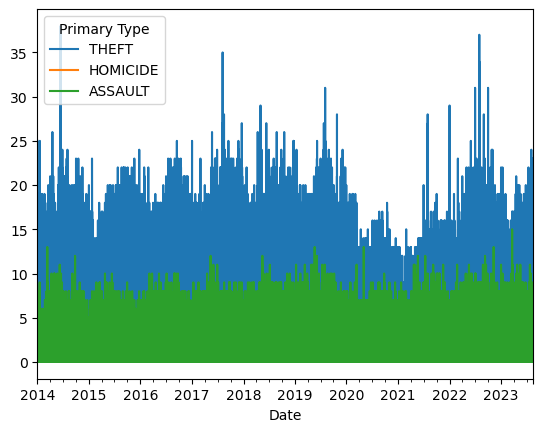

In [86]:
crimes_by_type.loc[:,['THEFT', 'HOMICIDE' , 'ASSAULT']].plot()

<Axes: xlabel='Date'>

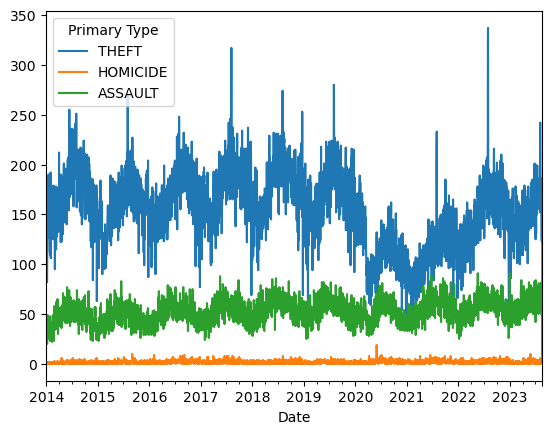

In [87]:
crimes_by_type.loc[:,['THEFT', 'HOMICIDE' , 'ASSAULT']].resample('D').sum().plot()

In [94]:
crimes_by_type.loc[:, ['THEFT', 'HOMICIDE', 'ASSAULT']]['2016'].resample('D').sum().plot()

KeyError: '2016'

## Create an interactive widget

Just a taste – see [the docs](https://ipywidgets.readthedocs.io/en/latest/index.html) for more options.

In [90]:
from ipywidgets import interact

In [93]:
@interact(crime_type = crimes_by_type.columns)
def plot_chart(crime_type='THEFT'):
    crimes_by_type.loc[:, crime_type]['2016'].resample('D').sum().plot(title=crime_type)

interactive(children=(Dropdown(description='crime_type', index=33, options=('ARSON', 'ASSAULT', 'BATTERY', 'BU…

In [92]:
def plot_chart(crime_type='THEFT'):
    crimes_by_type.loc[:, crime_type].resample('D').sum().plot()
plot_chart

<function __main__.plot_chart(crime_type='THEFT')>